Devoir 2 (Tidjani Bachir G3)

In [6]:
#Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [15]:
xls = pd.ExcelFile("EastWestAirlinesCluster.xlsx") #lire le fichier excel avec pandas
df1 = pd.read_excel(xls, 'data') #lire le contenu de la feuille data et le stocker dans un dataframe

x = pd.DataFrame(df1)
print(x)



       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [16]:
del  df1['ID#'] #supprimer la colonne ID# du dataframe
df1.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0


In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
#Création d'un objet K-Means avec un regroupement en 3 clusters (groupes)
model=KMeans(n_clusters=3)
#application du modèle sur notre jeu de données Iris
model.fit(x)

KMeans(n_clusters=3)

In [25]:
#Récupérer le label de chaque cluster auquel l'instance a été attribué (cluster :0,1,2) et les storer dans un vecteur 
labels=model.labels_
print(labels[:100])
Counter(labels) 


[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 2 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0]


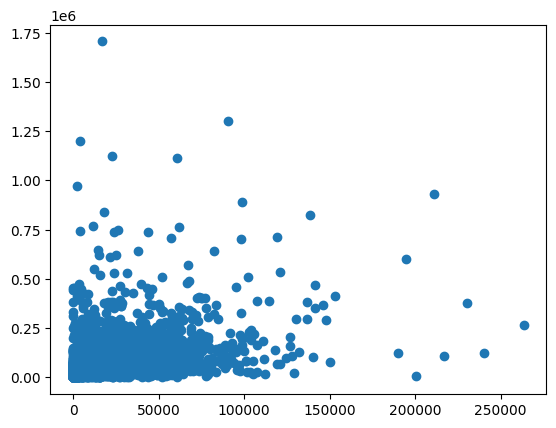

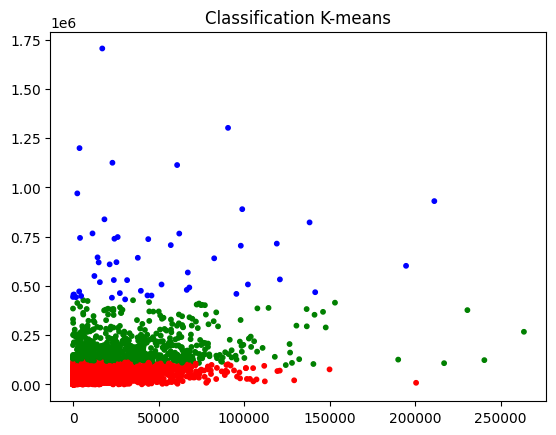

In [20]:
#Visualisation des clusters
plt.scatter(x.Bonus_miles, x.Balance)
plt.show()
colormap=np.array(['Red','green','blue'])

#Visualisation des clusters formés par K-Means
""" scatter is a function within plt used to create scatter plots, which are ideal for visualizing data points. """
plt.scatter(x.Bonus_miles, x.Balance,c=colormap[model.labels_],s=10)
plt.title('Classification K-means')
plt.show()

In [22]:
#Silouette score
from sklearn.metrics import silhouette_score

score = []
#tester plusieurs valeur de K de 2 à 11 et afficher le coefficient de silouette de chaque k
for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(x)
    labels = kmeans.labels_
    score.append(silhouette_score(x, labels, metric = 'euclidean'))#append(kmeans.inertia_)
    


Counter({8: 1598,
         0: 973,
         6: 522,
         7: 374,
         1: 205,
         3: 199,
         9: 79,
         2: 30,
         4: 14,
         5: 5})

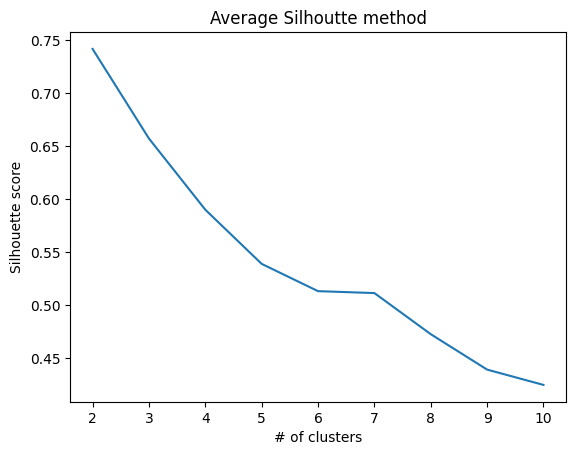

In [ ]:
# plotting the score
plt.plot(range(2,11), score)
plt.title('Average Silhoutte method')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.show()

D'aprés la courbe k=2 est le nombre optimale de cluster vu qu'il dispose d'un coefficient de silhouette le plus élevé 


In [28]:
from collections import Counter 
Counter(labels) 

Counter({0: 3242, 1: 707, 2: 50})

d'après la visualisation dans cette
 exemple le resultat de l'algorithme de cha est plus prtinent car les element dans la representation sont pas bien separrer et
   et 
// le resultat en utilisant CHA  Counter({0: 2489, 1: 1380, 2: 130}) mais
// en utilisant k-means est Counter({0: 3242, 1: 707, 2: 50})

dans k-means le premier kluster est tros grand et le dernier et le deuxieme sont trop petite 
